<a href="https://colab.research.google.com/github/toriqultonu/DIP_Lab_work/blob/main/CSE_4106_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

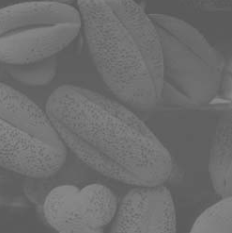

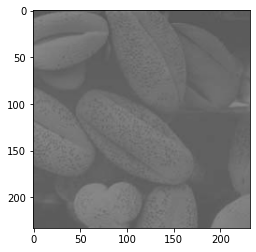

In [ ]:
#import the libraries
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import cv2

#reading the image 
image = cv2.imread('/content/Low Contrast.PNG', cv2.IMREAD_COLOR)
cv2_imshow(image)
plt.imshow(image)


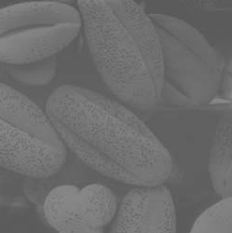

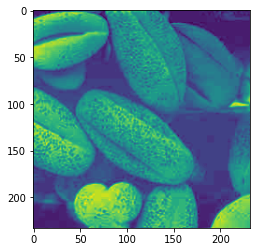

In [ ]:
#converting the image into grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#display the image
cv2_imshow(image_gray)
plt.imshow(image_gray)

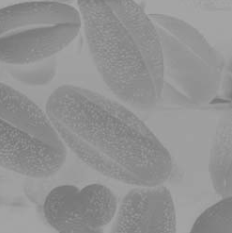

In [ ]:
# negative image transformation
def convertToNegativeImage(image_gray):
  height, width = image_gray.shape
  negative_img = image_gray
  for i in range(height):
    for j in range(width):
      negative_img[i][j] = 255 - image_gray[i][j]
  
  return negative_img

cv2_imshow(convertToNegativeImage(image_gray))


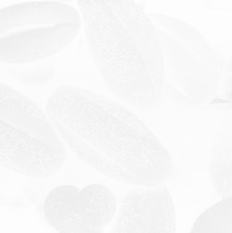

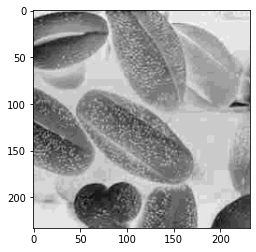

In [ ]:
# log transformation
def convertToLogImage(img):
  height, width = img.shape
  c = 255/np.log(1+np.max(img))
  log_img = img
  for i in range(height):
    for j in range(width):
      log_img[i][j] = c*np.log(1+img[i][j])

  #print(log_img)
  plt.imshow(log_img, cmap = 'gray')
  return log_img

cv2_imshow(convertToLogImage(image_gray))


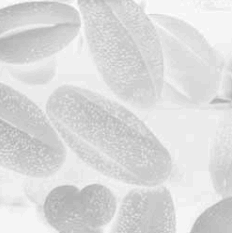

In [ ]:
# power law gamma transformation

def gammaCorrection(img):
  gamma = 5
  height, width = img.shape
  c = 255/255**gamma
  gamma_transform = img

  for i in range(height):
    for j in range(width):
      gamma_transform[i][j] = c * ((img[i][j]) ** gamma)

  cv2_imshow(gamma_transform)
 # return gamma_transform

gammaCorrection(image_gray)

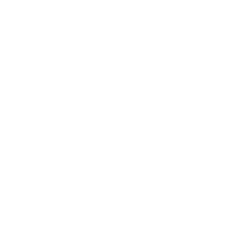

In [ ]:
# contrast stratching threshold

def contrastStratching(img):
  height, width = img.shape
  contraststratched = img
  for i in range(height):
    for j in range(width):
      if img[i][j] < 128:
        contraststratched[i][j] = 0
      else:
        contraststratched[i][j] = 255
  
  cv2_imshow(contraststratched)

contrastStratching(image_gray)

In [ ]:
# contrast stratching min-max
def contrastStratching(img):
  height, width = img.shape
  a = np.max(img)
  b = np.min(img)
  contraststratched = img
  for i in range(height):
    for j in range(width):
      if img[i][j] == a:
        contraststratched[i][j] = 0
      elif img[i][j] == b:
        contraststratched[i][j] = 255
      else:
        contraststratched[i][j] = 255*(img[i][j]-a/(b-a))
  
  cv2_imshow(contraststratched)

contrastStratching(image_gray)